In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [4]:
tc = pd.read_csv(r'https://drive.google.com/uc?export=download&id=16gSP_PeEdFXOU5c0Xuton2051GQrZ9dS')

In [5]:
X_train, X_test = train_test_split(tc, test_size=0.2, random_state=0)

y_train = X_train['Survived']
y_test = X_test['Survived']

del X_train['Survived']
del X_test['Survived']

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

best score = 0.8061952132374669
best params: {'Cs': 100, 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy = 0.788
f1_score = 0.712
roc_auc_score = 0.768


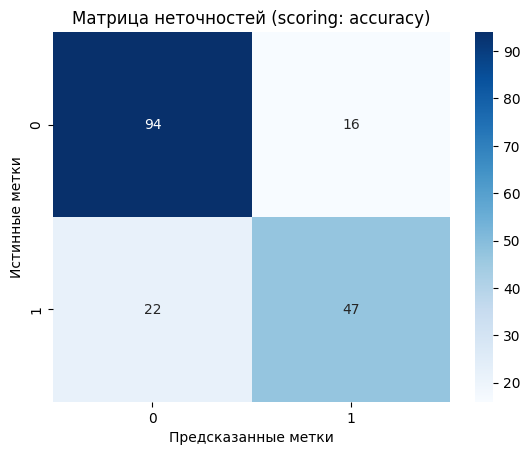

In [6]:
log_regressionCV = LogisticRegressionCV()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'Cs': [0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga']}]
gs = GridSearchCV(estimator=log_regressionCV,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best score = {gs.best_score_}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

loga_accuracy = clf.score(X_test, y_test)
loga_f1_score = f1_score(y_test, y_pred)
loga_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {loga_accuracy:.3f}')
print(f'f1_score = {loga_f1_score:.3f}')
print(f'roc_auc_score = {loga_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: accuracy)')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

best score = 0.9
best params: {'Cs': 1, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy = 0.687
f1_score = 0.317
roc_auc_score = 0.594


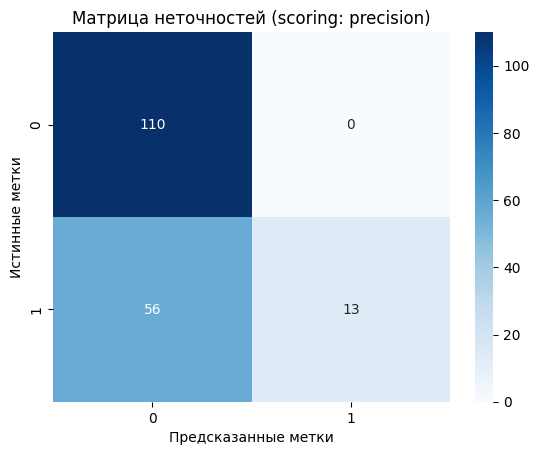

In [7]:
log_regressionCV = LogisticRegressionCV()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'Cs': [0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga']}]
gs = GridSearchCV(estimator=log_regressionCV,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best score = {gs.best_score_}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

logp_accuracy = clf.score(X_test, y_test)
logp_f1_score = f1_score(y_test, y_pred)
logp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {logp_accuracy:.3f}')
print(f'f1_score = {logp_f1_score:.3f}')
print(f'roc_auc_score = {logp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints

best score = 0.6774410774410774
best params: {'Cs': 10, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy = 0.788
f1_score = 0.712
roc_auc_score = 0.768


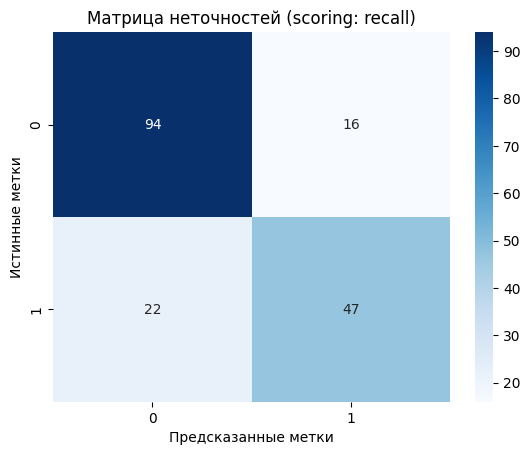

In [ ]:
log_regressionCV = LogisticRegressionCV()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'Cs': [0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga']}]
gs = GridSearchCV(estimator=log_regressionCV,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best score = {gs.best_score_}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

logr_accuracy = clf.score(X_test, y_test)
logr_f1_score = f1_score(y_test, y_pred)
logr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {logr_accuracy:.3f}')
print(f'f1_score = {logr_f1_score:.3f}')
print(f'roc_auc_score = {logr_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

(0.65, 0.82)

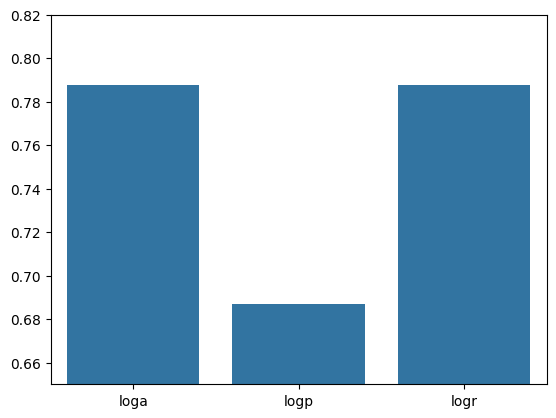

In [ ]:
sns.barplot(x=['loga', 'logp', 'logr'], y=[loga_accuracy, logp_accuracy, logr_accuracy])
plt.ylim(0.65, 0.82)

(0.3, 0.75)

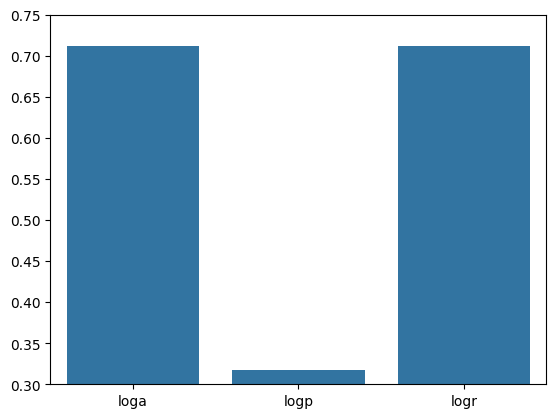

In [ ]:
sns.barplot(x=['loga', 'logp', 'logr'], y=[loga_f1_score, logp_f1_score, logr_f1_score])
plt.ylim(0.3, 0.75)

(0.5, 0.8)

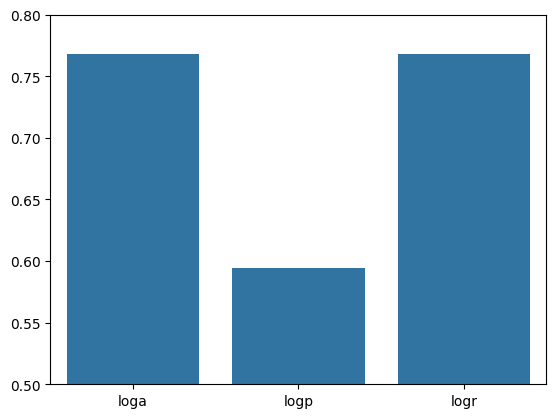

In [ ]:
sns.barplot(x=['loga', 'logp', 'logr'], y=[loga_roc, logp_roc, logr_roc])
plt.ylim(0.5, 0.8)